In [5]:
import matplotlib.pyplot as plt
import numpy as np

import os #to access path directory
from tqdm import tqdm #count images

import seaborn as sns #visual beautification
import cv2 #openCv for images
import io #unstructured and semi-structured web data into structured data

from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle #shuffles matrics randomly with continuation of same pattern
from tensorflow.keras.preprocessing.image import ImageDataGenerator #augmentation, annotation
from tensorflow.keras.applications import EfficientNetB6 #B0 to B7

#EarlyStopping: to avoid overfitting
#ReduceLROnplateau: Reduce Learning Rate based on weight
#TensorBoard: Visualization toolkit of tensorflow
#ModelCheckpoint: save the model or weight at every epoch to improve performance and avoid repeat
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

from tensorflow.keras.utils import to_categorical #encoding
#result checking
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from PIL import Image #pillow for img open, rotate and display
from warnings import filterwarnings # ignore DeprecationWarning
import ipywidgets as widgets  #import button
from IPython.display import display, clear_output #clear_output: clear process output while install

In [6]:
import ipywidgets as widgets  #import button
from IPython.display import display, clear_output

**To see all files one by one and findout unnecessary/hidden/corrupted file, name mismatch**

In [7]:
#os.listddir = to show all directory
#os.walk = to show each files with dir
#os.path.join=merge the paths
for dirname, _, filenames in os.walk("../input/cars-image-dataset/Cars Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/208.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/45.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/58.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/342.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/151.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/283.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/118.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/113.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/328.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/42.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/291.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/178.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/62.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyundai Creta/190.jpg
../input/cars-image-dataset/Cars Dataset/test/Hyunda

**To drop corrupted files in other directory**

In [8]:
#AD=[]
#for i in os.listdir("../input/cars-image-dataset/Cars Dataset/train/Audi"):
#   if i == ".DS_store":
#        continue
#print(AD)

In [9]:
#labels based on classwise folder name in directory
labels =["Audi", "Hyundai Creta", "Mahindra Scorpio", "Rolls Royce", "Swift", "Tata Safari", "Toyota Innova"]

**Prepare train and test Data together**

In [10]:

X_train=[] #training images
y_train=[] #trainging labels

image_size = 150

for i in labels:
    folderDirectory=os.path.join("../input/cars-image-dataset/Cars Dataset", "train", i) #tagging labels by i
    for j in tqdm(os.listdir(folderDirectory)): #counts image by tqdm
        image=cv2.imread(os.path.join(folderDirectory, j)) #image to array
        image=cv2.resize(image, (image_size, image_size))
        
        X_train.append(image)
        y_train.append(i)
for i in labels:
    folderDirectory=os.path.join("../input/cars-image-dataset/Cars Dataset/", "test", i)
    for j in tqdm(os.listdir(folderDirectory)):
        image=cv2.imread(os.path.join(folderDirectory, j))
        image=cv2.resize(image, (image_size, image_size))
        
        X_train.append(image)
        y_train.append(i)
#now we need to convert it to numpy array to make it workable
X_train = np.array(X_train)
y_train = np.array(y_train)
        

100%|██████████| 190/190 [00:00<00:00, 629.67it/s]


In [11]:
print("Shape of X_train:",'\n',X_train.shape)
print("Shape of y_train:",'\n',y_train.shape)

Shape of X_train: 
 (4165, 150, 150, 3)
Shape of y_train: 
 (4165,)


In [12]:
_,y_trainImageInfo = np.unique(y_train, return_counts = True)
print("Audi:")
print("Count:", y_trainImageInfo[0])
print("Hyundai Creta:")
print("Count:", y_trainImageInfo[1])
print("Mahindra Scorpio:")
print("Count:", y_trainImageInfo[2])
print("Rolls Royce:")
print("Count:", y_trainImageInfo[3])
print("Swift:")
print("Count:", y_trainImageInfo[4])
print("Tata Safari:")
print("Count:", y_trainImageInfo[5])
print("Toyota Innova:")
print("Count:", y_trainImageInfo[6])

Audi:
Count: 1013
Hyundai Creta:
Count: 338
Mahindra Scorpio:
Count: 391
Rolls Royce:
Count: 385
Swift:
Count: 526
Tata Safari:
Count: 547
Toyota Innova:
Count: 965


In [13]:
#shuffle based on random_state
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [14]:
print("Shape of X_train:",'\n',X_train.shape)
print("Shape of y_train:",'\n',y_train.shape)

Shape of X_train: 
 (4165, 150, 150, 3)
Shape of y_train: 
 (4165,)


In [15]:
print(y_train[0])
print(y_train[500])
print(y_train[1000])
print(y_train[1500])
print(y_train[2500])
print(y_train[4164])

Swift
Hyundai Creta
Toyota Innova
Audi
Rolls Royce
Hyundai Creta


**Train and Test Split**

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [17]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3540, 150, 150, 3)
X_test: (625, 150, 150, 3)
y_train: (3540,)
y_test: (625,)


In [18]:
print("y_train for index 0:", y_train[0])
print("y_test for index 0:", y_test[0])

y_train for index 0: Tata Safari
y_test for index 0: Hyundai Creta


**Categorical Conversion(label/one hot encoding)**

In [19]:
y_train_new =[]
y_test_new =[]

for i in y_train:
    y_train_new.append(labels.index(i)) #index value of y_train

y_train = y_train_new
y_train = to_categorical(y_train)

for i in y_test:
    y_test_new.append(labels.index(i))

y_test = y_test_new
y_test = to_categorical(y_test)
    




In [20]:
print("shape of y_train:", y_train.shape)
print("array of y_train:",'\n', y_train)
print('\n')
print("shape of y_test:", y_test.shape)
print("array of y_test:",'\n', y_test)



shape of y_train: (3540, 7)
array of y_train: 
 [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


shape of y_test: (625, 7)
array of y_test: 
 [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [21]:
#maxma value of that array of respective image
print(np.argmax(y_train[0]))
print(np.argmax(y_train[500]))
print(np.argmax(y_train[1000]))

5
0
6


In [22]:
#need to specify input_shape when include_top is false
efficient=EfficientNetB6(weights="imagenet", include_top = False, input_shape =(image_size, image_size, 3))

2022-09-04 17:53:12.971754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 17:53:12.980366: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 17:53:12.981131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 17:53:12.982883: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [23]:
import tensorflow as tf

In [24]:
#pooling can be avg or max
#dropout range 0.3 -0.5 which means 30-50% neurons will be dropped to avoid overfitting
model=efficient.output
model=tf.keras.layers.GlobalMaxPool2D()(model)
model=tf.keras.layers.Dropout(0.5)(model)
model=tf.keras.layers.Dense(7, activation="softmax")(model)
model=tf.keras.models.Model(inputs=efficient.input, outputs=model)

In [25]:
#increasing Parameters than others
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 150, 150, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [26]:
#loss for categorical value
model.compile(loss="categorical_crossentropy", 
              optimizer ="adam", 
              metrics =["accuracy"])

In [27]:
#.h5 = Hierarchical Data Format Ver. 5 file, verbose =1, to see execution
tensorboard = TensorBoard(log_dir ="logs")
checkpoint = ModelCheckpoint("efficient.h5",
                            monitor="val_accuracy",
                            mode ='auto',
                            verbose=1,
                            save_best_only=True
                            )

#monitor: quantity to be monitored.     
#factor: factor by which the learning rate will be reduced. 
#patience: number of epochs with no improvement after which learning rate will be reduced.     
#verbose: int. 0: quiet, 1: update messages.
#min_delta: early stopping of epochs
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", 
                             factor=0.3,
                             patience=2,
                             min_delta=0.001,
                             mode="auto",
                            verbose=1
                             )

2022-09-04 17:53:18.508251: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-04 17:53:18.508293: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-09-04 17:53:18.508346: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-09-04 17:53:18.651777: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-04 17:53:18.651966: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [28]:
history = model.fit(X_train, y_train, 
                    validation_split=0.15,
                   epochs=15, verbose=1,
                   batch_size=32,
                   callbacks =[tensorboard, checkpoint, reduce_lr])

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
2022-09-04 17:53:19.431944: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-09-04 17:53:43.391226: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 1/95 [..............................] - ETA: 40:39 - loss: 4.3867 - accuracy: 0.1250

2022-09-04 17:53:46.116635: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-04 17:53:46.116692: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/95 [..............................] - ETA: 2:21 - loss: 4.5858 - accuracy: 0.1406 

2022-09-04 17:53:46.930912: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-04 17:53:46.936332: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-09-04 17:53:47.149035: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 5957 callback api events and 5954 activity events. 
2022-09-04 17:53:47.300513: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-04 17:53:47.479444: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_09_04_17_53_47

2022-09-04 17:53:47.594549: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_09_04_17_53_47/46142dd08397.trace.json.gz
2022-09-04 17:53:47.827918: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/pl

95/95 [==============================] - 77s 543ms/step - loss: 1.3309 - accuracy: 0.6437 - val_loss: 0.7538 - val_accuracy: 0.8286

Epoch 00001: val_accuracy improved from -inf to 0.82863, saving model to efficient.h5
Epoch 2/15
95/95 [==============================] - 45s 478ms/step - loss: 0.2572 - accuracy: 0.9139 - val_loss: 0.4196 - val_accuracy: 0.9077

Epoch 00002: val_accuracy improved from 0.82863 to 0.90772, saving model to efficient.h5
Epoch 3/15
95/95 [==============================] - 44s 466ms/step - loss: 0.2350 - accuracy: 0.9285 - val_loss: 0.4288 - val_accuracy: 0.8832

Epoch 00003: val_accuracy did not improve from 0.90772
Epoch 4/15
95/95 [==============================] - 44s 468ms/step - loss: 0.1850 - accuracy: 0.9438 - val_loss: 0.2393 - val_accuracy: 0.9341

Epoch 00004: val_accuracy improved from 0.90772 to 0.93409, saving model to efficient.h5
Epoch 5/15
95/95 [==============================] - 44s 466ms/step - loss: 0.1815 - accuracy: 0.9508 - val_loss: 0.8

In [29]:
def accuracy_loss_plot (history):
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(222)
    plt.plot(history.history["loss"], "bo--", label="loss")
    plt.plot(history.history["val_loss"], "ro--", label = "val_loss")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()


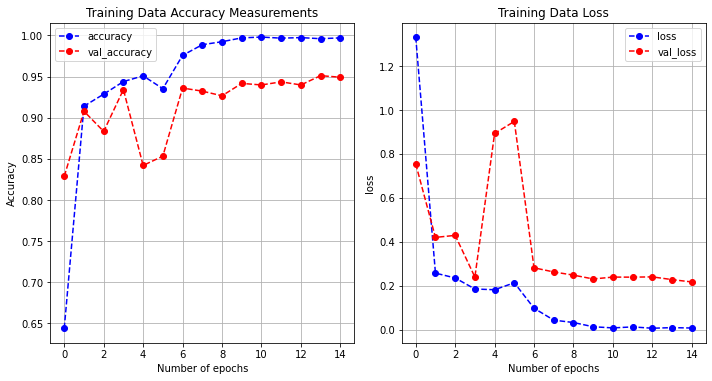

In [30]:
accuracy_loss_plot(history)

In [31]:
X_testloss=model.evaluate(X_test, y_test, verbose=1)

20/20 [==============================] - 2s 106ms/step - loss: 0.0716 - accuracy: 0.9776


In [32]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_new = np.argmax(y_test, axis=1)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       154
           1       1.00      0.98      0.99        50
           2       0.98      0.98      0.98        66
           3       0.93      0.94      0.93        53
           4       1.00      0.97      0.99        76
           5       0.98      0.97      0.97        91
           6       0.98      1.00      0.99       135

    accuracy                           0.98       625
   macro avg       0.98      0.97      0.98       625
weighted avg       0.98      0.98      0.98       625



<AxesSubplot:>

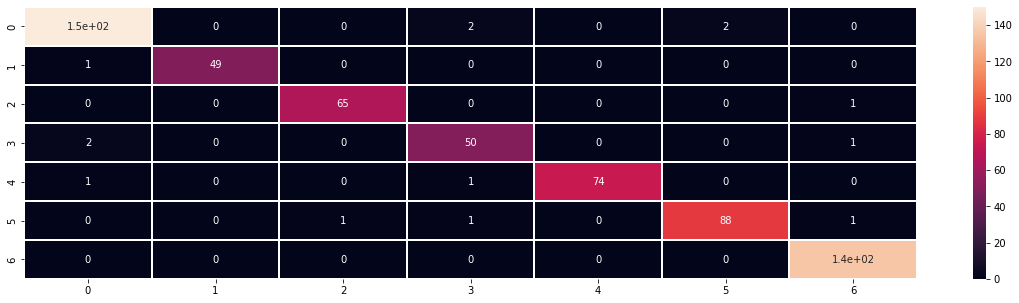

In [34]:
cm=confusion_matrix(y_test_new, y_pred)
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(cm, annot=True, linewidths=2, ax=ax)

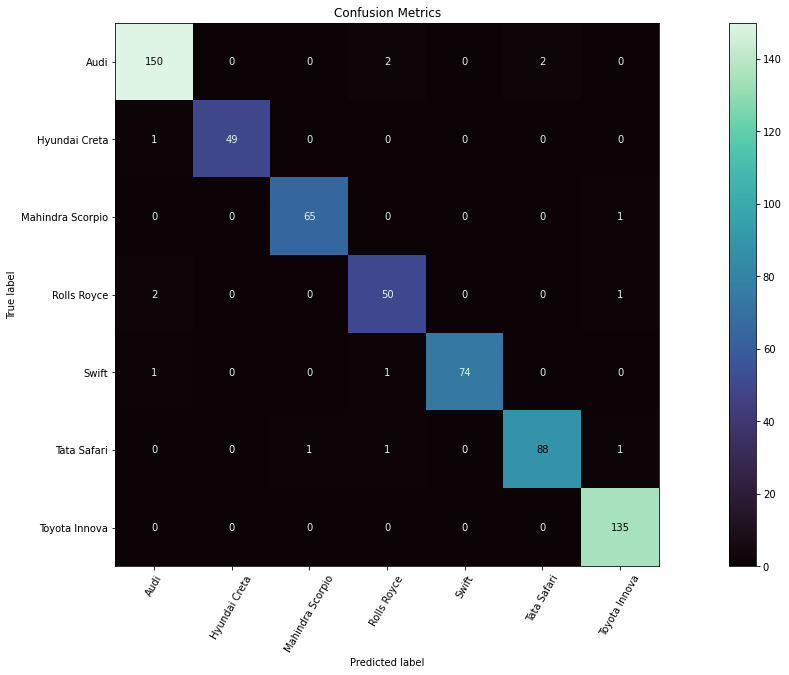

In [35]:
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(25,10)) 
display_c_m.plot(cmap='mako',ax=ax,xticks_rotation=60)
plt.title("Confusion Metrics")
plt.show()

**Create Function to upload image and resulted output**

In [57]:
def imagePrediction(upload):
    for name, fileinfo  in uploader.value.items():
        image = Image.open(io.BytesIO(fileinfo['content'])) #Image for PIL and io=input/output locall
    
    images = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    images = cv2.resize(images,(150, 150))
    images = images.reshape(1, 150, 150, 3)
    prd = model.predict(images)
    prd = np.argmax(prd, axis = 1)[0]
    
    if prd==0:
        prd="Audi"
    elif prd==1:
        prd="Hyundai Creta"
    elif prd==2:
        prd="Mahindra Scorpio"
    elif prd==3:
        prd="Rolls Royce"
    elif prd==4:
        prd="Swift"
    elif prd==5:
        prd="Tata Safari"
    elif prd==6:
        prd="Toyota Innova"
    
    if prd!=1:
        print(f"Model Predict That is a {prd}")
        

In [37]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [38]:
button=widgets.Button(description="Predict")
out=widgets.Output()

def on_button_click(_): 
    with out:
        clear_output()
        try: 
            imagePrediction(uploader)
        except:
            print("Enter the correct image file")
button.on_click(on_button_click)
widgets.VBox([button, out])
            